In [18]:
import pandas as pd
import glob
import pycountry
import pickle
import re
from tqdm.notebook import tqdm
import gensim
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim import corpora
import spacy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# list of all bibtext files
file_list = glob.glob('bibtex_files/**/*.bib')

In [3]:
# init storage
columns = ['DOI', 'Year', 'Journal', 'Title', 'Abstract', 'Affiliation']
corpus_df = pd.DataFrame(columns = columns)

In [4]:
# extract information from all bibtex entries -- store in dataframe

# loop through bib files
paper_count = -1
for working_file in tqdm(file_list):
    
    # read bibtex file by line
    with open(working_file) as fp:
        
        # read first line
        line = fp.readline()
        
        # loop until end of file
        while line:
            
            # read active line
            line = fp.readline()
            
            # find start of a new paper
            if line[:8] == '@article':
                paper_count = paper_count + 1
            
            # pull components
            if line[:5] == 'Title':
                title = line.split('{{')[1].split('}}')[0]
                corpus_df.loc[paper_count, 'Title'] = title
            if line[:7] == 'Journal':
                journal = line.split('{{')[1].split('}}')[0]
                corpus_df.loc[paper_count, 'Journal'] = journal
            if line[:8] == 'Abstract':
                text = line.split('{{')[1].split('\n')[0]
            
                # read until end of abstract (can be multi-line)
                end_of_abstract = False
                while not end_of_abstract:
                    line = fp.readline()
                    if len(line.split('}}')) == 1:
                        text = text + line.split('}}')[0].split('\n')[0]
                    else:
                        text = text + line.split('}}')[0].split('\n')[0]
                        end_of_abstract = True
                corpus_df.loc[paper_count, 'Abstract'] = text

            if line[:3] == 'DOI':
                doi = line.split('{{')[1].split('}}')[0]
                corpus_df.loc[paper_count, 'DOI'] = doi
            if line[:4] == 'Year':
                year = line.split('{{')[1].split('}}')[0]
                corpus_df.loc[paper_count, 'Year'] = year
            if line[:17] == 'Early Access Date':
                year = line.split('{{')[1].split('}}')[0][-4:]
                corpus_df.loc[paper_count, 'Year'] = year
            if line[:11] == 'Affiliation':
                affiliation = line.split('{{')[1].split('}}')[0]
                affiliation1 = affiliation.split('.')[0]
                affiliation2 = affiliation1.split(',')[-1]
                affiliation3 = affiliation2.split(' ')[-1]
                test_list = ['1','2','3','4','5','6','7','8','9','0']
  
                #Setting all the zipcodes to US of A!            
                if [ele for ele in test_list if(ele in affiliation3)]:
                    affiliation3 = 'USA'
                corpus_df.loc[paper_count, 'Affiliation'] = affiliation3
            
    # close file
    fp.close()

In [5]:
# pickle the output
corpus_df.to_pickle("data/raw_corpus.pkl")

In [6]:
# convert abstracts to strings
# required to use `re` commands
data = corpus_df['Abstract'].apply(str)

In [7]:
# manually clean the abstracts

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', text) for text in data]

# Remove new line characters
data = [re.sub('\s+', ' ', text) for text in data]

# Remove distracting single quotes
data = [re.sub("\'", "", text) for text in data]

# Hand clean everything we notice
data = [re.sub('ﬂ', 'fl', text) for text in data]
data = [re.sub('[ü←öä∀↓玉成‘’“”…©@-_/≤≥−–∂◦‡×γ∞∼±∞→⇔¨þ´≡íáˇý°φτττ¼.•˜ϕˆ˜°Á¯πłłβκßθıﬁ‰:;ψδ∈ρÞωÀηµεψ∝ðξα²®≈λσ¢·∗¤√]', '', text) for text in data]
data = [re.sub('fig', '', text) for text in data]
data = [re.sub('use', '', text) for text in data]
data = [re.sub('also', '', text) for text in data]
data = [re.sub('show', '', text) for text in data]
data = [re.sub('even', '', text) for text in data]
data = [re.sub('give', '', text) for text in data]
data = [re.sub('versant', '', text) for text in data]
data = [re.sub('statistique', '', text) for text in data]
data = [re.sub('des_crue', '', text) for text in data]
data = [re.sub('pour', '', text) for text in data]
data = [re.sub('alor', '', text) for text in data]
data = [re.sub('measurement', '', text) for text in data]
data = [re.sub('result', '', text) for text in data]
data = [re.sub('method', '', text) for text in data]
data = [re.sub('study', '', text) for text in data]
data = [re.sub('estimate', '', text) for text in data]
data = [re.sub('set', '', text) for text in data]
data = [re.sub('function', '', text) for text in data]
data = [re.sub('test', '', text) for text in data]
data = [re.sub('result', '', text) for text in data]
data = [re.sub('equation', '', text) for text in data]
data = [re.sub('mean', '', text) for text in data]
data = [re.sub('total', '', text) for text in data]
data = [re.sub('des_crue', '', text) for text in data]
data = [re.sub('mazone_obido', '', text) for text in data]
data = [re.sub('resultat', '', text) for text in data]
data = [re.sub('bido', '', text) for text in data]
data = [re.sub('debit', '', text) for text in data]
data = [re.sub('crue', '', text) for text in data]
data = [re.sub('include', '', text) for text in data]
data = [re.sub('faible', '', text) for text in data]
data = [re.sub('toujour', '', text) for text in data]
data = [re.sub('saturee', '', text) for text in data]
data = [re.sub('donnee', '', text) for text in data]
data = [re.sub('etude', '', text) for text in data]
data = [re.sub('rance', '', text) for text in data]
data = [re.sub('time', '', text) for text in data]
data = [re.sub('consist', '', text) for text in data]
data = [re.sub('update', '', text) for text in data]
data = [re.sub('opyright_ohn', '', text) for text in data]
data = [re.sub('copyright', '', text) for text in data]

In [8]:
# change each document to a list of words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [10]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [11]:
# NLTK Stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [12]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# Must run this command separately, but only once: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

[['examine',
  'project',
  'increase',
  'atmospheric',
  'concomitant',
  'shift',
  'air',
  'temperature',
  'precipitation',
  'affect',
  'water',
  'carbon',
  'flux',
  'sian',
  'tropical_rainforest',
  'use',
  'combination',
  'field',
  'simplify',
  'hydrological',
  'carbon',
  'model',
  'lobal',
  'limate',
  'odel',
  'projection',
  'model',
  'link',
  'canopy',
  'photosynthetic',
  'flux',
  'transpiration',
  'bulk',
  'canopy',
  'conductance',
  'semi',
  'empirical',
  'model',
  'intercellular',
  'concentration',
  'transpiration',
  'rate',
  'determine',
  'hydrologic',
  'balance',
  'model',
  'primary',
  'force',
  'hydrologic',
  'model',
  'current',
  'project',
  'rainfall',
  'statistic',
  'main',
  'novelty',
  'analysis',
  'effect',
  'increase',
  'air',
  'temperature',
  'vapor',
  'pressure',
  'deficit',
  'effect',
  'shift',
  'precipitation',
  'statistic',
  'explicitly',
  'consider',
  'model',
  'validate',
  'field',
  'conduct',
 

In [14]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

[[(0, 1), (1, 3), (2, 2), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 1), (9, 2), (10, 4), (11, 3), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 2), (37, 1), (38, 1), (39, 1), (40, 2), (41, 3), (42, 1), (43, 1), (44, 3), (45, 1), (46, 5), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 7), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 4), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 4), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 3), (84, 1), (85, 1), (86, 3), (87, 4), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)], [(1, 1), (3, 3), (25, 1), (30, 2), (40, 2), (45, 1), (55, 1), (57, 1), (67, 1), (83, 2), (85, 1), (93, 3), (94, 2), (95, 2), (96, 1), (97, 1), (98, 2), (99, 1), 

In [15]:
# Save the corpus and the id2word map
with open("data/cleaned_corpus.pkl", 'wb') as f:
     pickle.dump(corpus, f)

with open("data/id2word.pkl", 'wb') as f:
     pickle.dump(id2word, f)

In [16]:
# Human readable format of document-term-frequency matrix
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

[[('affect', 1),
  ('air', 3),
  ('alter', 2),
  ('analysis', 1),
  ('appreciably', 1),
  ('assume', 1),
  ('atmospheric', 4),
  ('balance', 1),
  ('basis', 1),
  ('bulk', 2),
  ('canopy', 4),
  ('carbon', 3),
  ('climate', 1),
  ('climatic', 1),
  ('combination', 1),
  ('compute', 2),
  ('concentration', 3),
  ('concomitant', 2),
  ('condition', 1),
  ('conduct', 1),
  ('conductance', 1),
  ('consequence', 1),
  ('consider', 1),
  ('constant', 1),
  ('current', 2),
  ('decrease', 1),
  ('deficit', 1),
  ('derive', 1),
  ('determine', 1),
  ('distribution', 1),
  ('effect', 2),
  ('egardless', 1),
  ('elevated', 2),
  ('ell', 1),
  ('empirical', 1),
  ('espite', 1),
  ('euning', 2),
  ('examine', 1),
  ('explicitly', 1),
  ('factor', 1),
  ('field', 2),
  ('flux', 3),
  ('force', 1),
  ('formulation', 1),
  ('hydrologic', 3),
  ('hydrological', 1),
  ('increase', 5),
  ('independent', 1),
  ('intercellular', 2),
  ('investigate', 1),
  ('lant', 1),
  ('limate', 1),
  ('linearly', 1),
 

In [61]:
# Count journals per year

# unique journals
journals = np.unique(corpus_df['Journal'])
years = np.unique(corpus_df['Year'])

# init storage
corpus_distribution = np.full([len(journals), len(years)], np.nan)

# count per journal per year
for j, journal in enumerate(journals):
    for y, year in enumerate(years):
        corpus_distribution[j, y] = len(np.where(
            (corpus_df['Year'] == year) & (corpus_df['Journal'] == journal))[0])

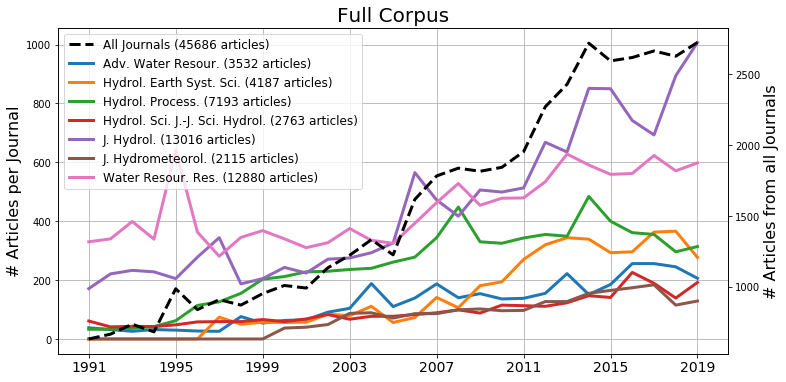

In [120]:
# Create corpus figure

# init figures
fig, ax = plt.subplots(figsize=(12,6))

# plot full corpus count by year
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
lines = ax2.plot(years, np.sum(corpus_distribution, axis=0), 
                 'k--', 
                 label=f'All Journals ({np.sum(corpus_distribution).astype(int)} articles)', 
                 linewidth = 3)  

# plot each journal individually
for j, journal in enumerate(journals):
    linej = ax.plot(years, corpus_distribution[j,:], 
                       linewidth = 3,
                       label=f'{journal} ({np.sum(corpus_distribution[j,:]).astype(int)} articles)')
    lines = lines+linej
    
# axis labels
ax.set_title(f'Full Corpus', fontsize=20)
ax.set_ylabel('# Articles per Journal', fontsize=16)
ax2.set_ylabel('# Articles from all Journals', fontsize=16)
ax.set_xticks(years[np.floor(np.linspace(0,len(years)-1,8)).astype(int)])
ax.set_xticklabels(years[np.floor(np.linspace(0,len(years)-1,8)).astype(int)], fontsize=14)

# legend
labs = [l.get_label() for l in lines]
ax.legend(lines, labs, fontsize=12)

# aesthetics    
ax.grid()

# Save figure
plt.savefig('figures/full_corpus.png')